In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils, to_categorical
from keras.datasets import cifar10
from keras import backend as K

import random

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
# Load pre-shuffled CIFAR10 data into train and test sets
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

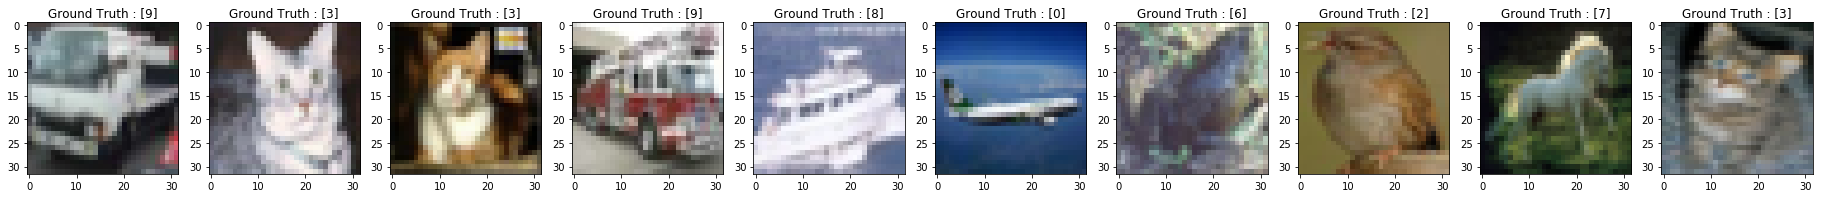

In [9]:
plt.figure(figsize=(32,32)) 
amount = 10

for i in range(amount):
    rand_id = random.randint(1, train_images.shape[0])
    plt.subplot(1,amount,(i+1))
    plt.title("Ground Truth : {}".format(train_labels[rand_id]))
    plt.imshow(train_images[rand_id])

plt.show()

## Build Model

In [10]:
classes = np.unique(train_labels)
num_classes = len(classes)

# input image dimensions
img_rows, img_cols = train_images.shape[1], train_images.shape[2]

In [11]:
if K.image_data_format() == 'channels_first':
    train_images = train_images.reshape(train_images.shape[0], train_images.shape[3], img_rows, img_cols)
    test_images = test_images.reshape(test_images.shape[0], train_images.shape[3], img_rows, img_cols)
    input_shape = (train_images.shape[3], img_rows, img_cols)
else:
    # train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
    # test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, train_images.shape[3])

In [12]:
# change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[6])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[6])

Original label 0 :  [2]
After conversion to categorical ( one-hot ) :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
def createModel(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [14]:
model_aug = createModel(input_shape, num_classes)

In [15]:
model_aug.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [16]:
batch_size = 256
epochs = 100

In [17]:
model_aug.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
data_augmentated = ImageDataGenerator(
                    rotation_range=10,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    shear_range=0.,
                    zoom_range=1.,
                    horizontal_flip=True,
                    vertical_flip=False)

In [ ]:
history = model_aug.fit_generator(data_augmentated.flow(train_images, train_labels_one_hot, batch_size=batch_size),
                                     steps_per_epoch=int(np.ceil(train_images.shape[0] / float(batch_size))),
                                     epochs=epochs,
                                     validation_data=(test_images, test_labels_one_hot),
                                     workers=4)

In [ ]:
model_aug.evaluate(test_images, test_labels_one_hot)

In [ ]:
# plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 

In [ ]:
# plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['acc'],'r',linewidth=3.0)
plt.plot(history2.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

<hr/>